<a href="https://colab.research.google.com/github/loka1/ai-spam-model/blob/main/Untitled48.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
! git clone https://github.com/loka1/ai-spam-model.git app

fatal: destination path 'app' already exists and is not an empty directory.


In [8]:
!pip install -r app/requirements.txt

  Using cached absl_py-1.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached appnope-0.1.2-py2.py3-none-any.whl.metadata (1.1 kB)
  Using cached asttokens-2.0.5-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached black-22.1.0-py3-none-any.whl.metadata (42 kB)
  Using cached cachetools-5.0.0-py3-none-any.whl.metadata (4.5 kB)
  Using cached certifi-2021.10.8-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl.metadata (11 kB)
  Using cached click-8.0.4-py3-none-any.whl.metadata (3.2 kB)
  Using cached cycler-0.11.0-py3-none-any.whl.metadata (785 bytes)
  Using cached debugpy-1.5.1-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached decorator-5.1.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached executing-0.8.2-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl.metadata (871 bytes)
  Using cached fonttools-4.29.1-py3-none-any.whl.metadata (119 kB)
  Using cached gast-0.5.3-py3-none-any.whl.metada

# Importing Packages

Import packages

In [9]:
import pandas as pd
import numpy as np
import tqdm
import nltk
import time
import random
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from operator import itemgetter
from PIL import Image
import keras as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, recall_score, precision_score
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall, Precision
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Load Data and Preprocess

## enron_spam


In [84]:
!wget https://huggingface.co/datasets/SetFit/enron_spam/resolve/main/enron_spam_data.csv -O /content/app/enron_spam_data.csv


--2025-04-30 09:20:55--  https://huggingface.co/datasets/SetFit/enron_spam/resolve/main/enron_spam_data.csv
Resolving huggingface.co (huggingface.co)... 18.172.134.4, 18.172.134.88, 18.172.134.24, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/datasets/SetFit/enron_spam/009c86359b5bd6ec142a9b9ca85075ec864fd8c7c1c378c9a430e9427d0f7d57?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27enron_spam_data.csv%3B+filename%3D%22enron_spam_data.csv%22%3B&response-content-type=text%2Fcsv&Expires=1746008455&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0NjAwODQ1NX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9kYXRhc2V0cy9TZXRGaXQvZW5yb25fc3BhbS8wMDljODYzNTliNWJkNmVjMTQyYTliOWNhODUwNzVlYzg2NGZkOGM3YzFjMzc4YzlhNDMwZTk0MjdkMGY3ZDU3P3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&Signature=uUXUQswH

In [85]:
!head app/enron_spam_data.csv

Message ID,Subject,Message,Spam/Ham,Date
0,christmas tree farm pictures,,ham,1999-12-10
1,"vastar resources , inc .","gary , production from the high island larger block a - 1 # 2 commenced on
saturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and
10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .
george x 3 - 6992
- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16
am - - - - - - - - - - - - - - - - - - - - - - - - - - -
daren j farmer
12 / 10 / 99 10 : 38 am


In [86]:
df = pd.read_csv('app/enron_spam_data.csv')
df.head()

Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [90]:

df = df.rename(columns={"Spam/Ham": "Category", "Message": "message"})
df.head()


Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [91]:
pd.set_option('display.max_colwidth', None)

print(df.head(5))

   Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [92]:
df.drop_duplicates(subset=['message'], keep='first', inplace=True)

In [93]:
df.shape

(29780, 5)

In [94]:
df.value_counts('Category', normalize=True)

Category
ham     0.530356
spam    0.469644
Name: proportion, dtype: float64

Create a binary target where 1 = Spam and 0 = Ham. Rename the columns.

In [95]:
df['target'] = [1 if x=='spam' else 0 for  x in df['Category']]
df.drop('Category', axis=1, inplace=True)
# Select only the 'message' and 'target' columns
df = df[['message', 'target']]  # Keep only message and target
df.drop_duplicates(subset=['message'], keep='first', inplace=True)
df_spam = df[df.target==1]
df_ham = df[df.target==0]


<ipython-input-95-cc7953669bcc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['message'], keep='first', inplace=True)


Observe the baseline accuracy

In [96]:
df.target.value_counts(normalize=True)

target
0    0.530356
1    0.469644
Name: proportion, dtype: float64

Baseline is 53%

Define X and y datasets, or predictors and target datasets.

In [97]:
X= df.message
y= df.target

I have left punctuation and non-alphanumeric characters in here for now because they are harmless. The Tensorflow Tokenizer can deal with them.


# EDA Plots and Word Clouds

## EDA Plots

In [102]:
df['word_count'] = df.message.apply(lambda x: len(str(x).split(' ')) if not isinstance(x, float) else 0)

In [104]:
df.groupby('target')['word_count'].agg(['count','mean','median'])

count        mean  median
target                           
0       15794  317.893757   156.0
1       13986  237.957028   119.0

In [105]:
df.sample(5)

message  \
1803   vance ,\nwhat is the price and volume that should be entered for october ? apparently ,\nengage changed their name to coastal was the reason the deal ticket was\ncreated that way .\nbob\nvance l taylor\n10 / 11 / 2000 02 : 47 pm\nto : robert cotten / hou / ect @ ect\ncc : pat clynes / corp / enron @ enron , daren j farmer / hou / ect @ ect , aimee\nlannou / hou / ect @ ect , melissa graves / hou / ect @ ect\nsubject : re : meter 5848\nbob ,\nyou are correct , i did request a ticket at meter 5848 as a spot purchase .\nhowever , i ' m not sure why the ticket was created in the name of coastal ; it\nshould have been in the name engage energy us , lp . as for october , hplc is\nbuying this package of gas on a " spot " basis and a ticket should be created\nand entered in to sitara .\nthanks ,\nvlt\nx 3 - 6353\nenron north america corp .\nfrom : robert cotten 10 / 11 / 2000 11 : 12 am\nto : vance l taylor / hou / ect @ ect\ncc : pat clynes / corp / enron @ enron , daren j farmer / hou / ect @ ect , aimee\nlannou / hou / ect @ ect\nsubject : meter 5848\nvance ,\non august 28 , you sent a request to enter a spot ticket for september\nproduction on engage energy , meter # 5848 , 240 mmbtu / d . the ticket was\nentered as a purchase from coastal merchant energy , l . p . a volume of 304\nmmbtu flowed on meter # 5848 on 10 / 1 / 00 . should there be a spot purchase at\nmeter # 5848 in october ? please advise . thanks .\nbob\n- - - - - - - - - - - - - - - - - - - - - - forwarded by robert cotten / hou / ect on 10 / 11 / 2000 10 : 45\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\naimee lannou 10 / 11 / 2000 10 : 02 am\nto : robert cotten / hou / ect @ ect\ncc : daren j farmer / hou / ect @ ect , pat clynes / corp / enron @ enron\nsubject : meter 5848\nbob - there is flow at meter 5848 for 10 / 1 . in sept . it was on a gathering\ncontract on deal # 382621 for coastal merchant energy . could you please\ncheck to see if there should be a deal for october ?\nthanks .\naimee   
29092                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ken lay announced today that he has resigned from enron ' s board of directors . his resignation is effective immediately .\nin a press release , ken said , " i want to see enron survive and successfully emerge from reorganization . due to the multiple inquiries and investigations , some of which are focused on me personally , i believe that my involvement has become a distraction to achieving this goal . "\nhe added , " my concern is for current and former enron employees and other stakeholders , and i feel that it is in their best interest f

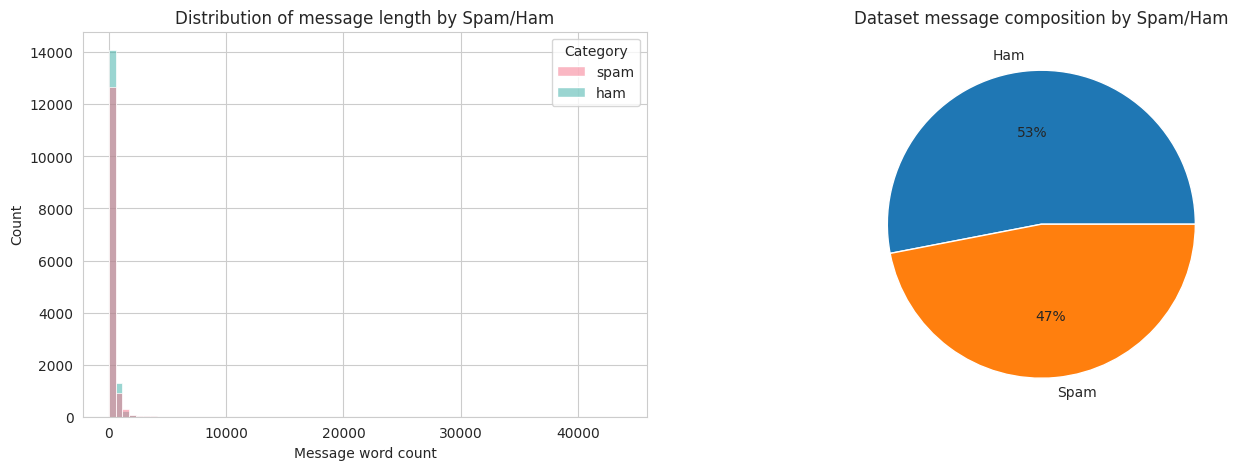

In [109]:
# Plot message length by spam/ham

# Create 'Category' column from 'target' column
df['Category'] = ['spam' if x == 1 else 'ham' for x in df['target']]

# Convert to categorical type
df['Category'] = pd.Categorical(df['Category'], ['spam','ham'])

sns.set_style("whitegrid")

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,5))
sns.histplot(data=df,
             x="word_count",
             hue="Category",
             palette='husl',
             bins=75,
             ax=ax[0],
             legend=True).set_title('Distribution of message length by Spam/Ham')
ax[0].set_xlabel('Message word count')
ax[0].set_ylabel('Count')
colors = sns.color_palette('husl')

ax[1].pie(df.Category.value_counts(normalize=True), labels = ['Ham','Spam'], autopct='%0.f%%')
ax[1].set_title('Dataset message composition by Spam/Ham')
plt.savefig('app/images/eda.png',bbox_inches='tight',dpi=400, pad_inches=0.1)
plt.show()

In [110]:
df.sort_values(by='word_count', ascending=False)

message  \
14254  enron : a wake - up call\nthe wall street journal , 12 / 04 / 01\nfall of a power giant : dynegy hits back at enron with lawsuit - - - claim is that failed merger entitles concern to get northern natural gas\nthe wall street journal , 12 / 04 / 01\nenron secures $ 1 . 5 billion in new financing - - - j . p . morgan , citigroup pact is first step ; now , lifeline is sought for trading unit\nthe wall street journal , 12 / 04 / 01\nfall of a power giant : burst of chapter 11 filings marks big year for the bankruptcy bar\nthe wall street journal , 12 / 04 / 01\nfall of a power giant : now is the time for creditors to vie against each other\nthe wall street journal , 12 / 04 / 01\nauditor andersen is added to enron 401 ( k ) lawsuit\nthe wall street journal , 12 / 04 / 01\nstadium jinx : what to call enron field ? ` enron folds , ' maybe - - - firms that put their names on arenas hit hard times ; former trans world dome\nthe wall street journal , 12 / 04 / 01\nas kpn prepares to sell new shares , investors remain lukewarm toward dutch telecom firm\nthe wall street journal , 12 / 04 / 01\nsmall - stock focus : genesis energy , valentis plummet , as small - cap stocks fall slightly\nthe wall street journal , 12 / 04 / 01\ntreasurys manage modest gains despite reports suggesting that economy could be rebounding\nthe wall street journal , 12 / 04 / 01\nafter enron , ` mark to market ' accounting gets scrutiny\nthe wall street journal , 12 / 04 / 01\nj . p . morgan , citigroup decline on fears about enron exposure\nthe wall street journal , 12 / 04 / 01\ncorrections\nthe new york times , 12 / 04 / 01\nhobbled enron tries to stay on its feet\nthe new york times , 12 / 04 / 01\nsent home to sit and wait by the phone\nthe new york times , 12 / 04 / 01\nenron causes 5 major japanese money market funds to plunge\nthe new york times , 12 / 04 / 01\nplenty of pain to go around for small investors , funds , workers and creditors\nthe new york times , 12 / 04 / 01\nand the winners in the case are . . .\nthe new york times , 12 / 04 / 01\ncollapse may reshape the battlefield of deregulation\nthe new york times , 12 / 04 / 01\nas investors worry about mideast and enron , shares fall\nthe new york times , 12 / 04 / 01\nthe markets : currencies\nthe new york times , 12 / 04 / 01\na defining issue\nthe new york times , 12 / 04 / 01\nfree lessons on corporate hubris , courtesy of enron\nthe washington post , 12 / 04 / 01\nenron readies for layoffs , legal battle ; rival dynegy sues for pipeline network\nthe washington post , 12 / 04 / 01\nenron ' s ' con '\nthe washington post , 12 / 04 / 01\nenron ' s fall\nthe washington post , 12 / 04 / 01\nenron slashes jobs , lines up financing energy : funding of $ 1 . 5 billion is intended to keep trading operations going amid move to reorganize .\nlos angeles times , 12 / 04 / 01\nsome power customers could see disruptions\nlos angeles times , 12 / 04 / 01\nmarkets enron , mideast weigh on stocks wall st . : dow declines 0 . 9 % , and nasdaq is down 1 . 3 % . oil prices rise ; bond yields fall .\nlos angeles times , 12 / 04 / 01\nbanks ' enron losses seen limited bankruptcy : the firm says it owes three major lenders $ 7 . 55 billion , but analysts say that total overstates the exposure .\nlos angeles times , 12 / 04 / 01\nenron shares trading ; nyse to review status\nlos angeles times , 12 / 04 / 01\nenron ' s failure\nlos angeles times , 12 / 04 / 01\nenron lays off 4 , 000\nhouston chronicle , 12 / 04 / 01\nin tit for tat , dynegy says it will sue enron\nhouston chronicle , 12 / 04 / 01\npain of bankruptcy to hurt many others\nhouston chronicle , 12 / 04 / 01\nwoes leave enron field ' s name in question\nhouston chronicle , 12 / 04 / 01\nenron employees : tell us your stories\nhouston chronicle , 12 / 04 / 01\nlenders lining up , but hard fight looms\nhouston chronicle , 12 / 04 / 01\nq & a on the enron bankruptcy\nhouston chronicle , 12 / 04 / 01\nenron ' s recent troubles\nhouston chroni

## Word Clouds

In [111]:
# count word appearances
def word_counter(mat):
    count = np.array(mat.sum(axis=0))[0]
    return count

# sort words by frequency
def word_frequency_sorter(words, counts):
    sort_result = sorted(zip(words, list(counts)),
                         key=itemgetter(1), reverse=True)
    return sort_result

In [112]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [114]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Series text column
tvec = TfidfVectorizer(stop_words = stop,
                       ngram_range = (1, 2),
                       max_features = 1000,
                       token_pattern = '[A-Za-z0-9]+(?=\\s+)',
                        )

# Fill or drop NaN values in 'message' column before fitting
# Option 1: Drop rows with NaN values in 'message'
df = df.dropna(subset=['message'])

# Option 2: Fill NaN values with an empty string
# df['message'] = df['message'].fillna('')

# Fit vectorizer on text data
tvec.fit(df.message)

# Transform data
tvec_mat = tvec.transform(df.message)

# words occuring
words = tvec.get_feature_names_out()

# count word appearances
csum= word_counter(tvec_mat)

In [115]:
# sort words by frequency
df_word_frequency = pd.DataFrame(word_frequency_sorter(
    words, csum), columns=["word", "frequency_series"])
df_word_frequency.set_index('word', inplace=True)
df_word_frequency.index.name = None
df_word_frequency.head(20)

frequency_series
enron        1132.934889
com          1008.588539
ect          1004.361361
please        905.178108
http          809.956178
1             717.224835
2             653.719966
3             638.006392
e             634.667218
get           603.127819
would         589.535726
email         546.587529
thanks        532.814298
2001          532.217115
time          524.876569
know          524.667771
see           523.866117
2000          514.878924
new           513.670084
us            513.366616

In [116]:
# all description text
wrds_cnt = " ".join(wrds for wrds in df.message)
print ("There are {} unique words in all the descriptions.".format(len(wrds_cnt)))

# create stopword list:
stopwords = set(STOPWORDS)

# create word cloud
wc_all = WordCloud(stopwords=stopwords,
                                  max_words=200,
                                  background_color="white")

# generate a word cloud image
wc_all.generate(wrds_cnt)

There are 43644719 unique words in all the descriptions.


In [118]:
# ham description text
wrds_cnt = " ".join(str(wrds) for wrds in df_ham.message) # Cast each element to string using str()
print ("There are {} unique words in ham the descriptions.".format(len(wrds_cnt)))

# create word mask
mask_ham = np.array(Image.open('app/images/ham2.png'))

# create word cloud
wc_ham = WordCloud(stopwords=STOPWORDS,
               mask=mask_ham, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask_ham.shape[1],
               height=mask_ham.shape[0])
wc_ham.generate(wrds_cnt);

There are 25334643 unique words in ham the descriptions.


In [122]:
# spam description text
wrds_cnt = " ".join(wrds for wrds in df_spam.message)
print ("There are {} unique words in spam the descriptions.".format(len(wrds_cnt)))

# create word mask
mask_spam = np.array(Image.open('app/images/spam2.png'))

# create word cloud
wc_spam = WordCloud(stopwords=STOPWORDS,
               mask=mask_spam, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask_spam.shape[1],
               height=mask_spam.shape[0])
wc_spam.generate(wrds_cnt);

There are 18310079 unique words in spam the descriptions.


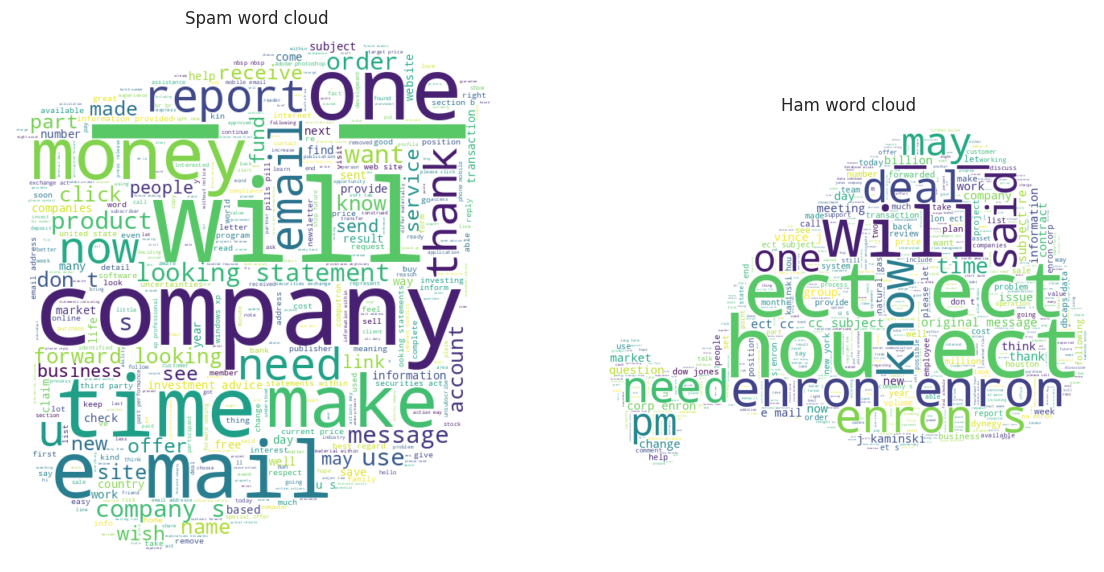

In [123]:
# combine wordcloud plots
sns.set_style("white")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
ax[0].imshow(wc_spam, interpolation="bilinear")
ax[0].set_title('Spam word cloud')
ax[1].imshow(wc_ham, interpolation="bilinear")
ax[1].set_title('Ham word cloud')
fig.set_facecolor("white")
ax[0].axis('off')
ax[1].axis('off')
plt.savefig('app/images/cloud.png',bbox_inches='tight',dpi=400, pad_inches=0.1)
plt.show()

# Tensorflow Modelling

In [124]:
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [125]:
SEQUENCE_LENGTH = 50 # the length of all sequences (number of words per sample)
EMBEDDING_SIZE = 100  # Using 100-Dimensional GloVe embedding vectors
TEST_SIZE = 0.25 # ratio of testing set

BATCH_SIZE = 64
EPOCHS = 20 # number of epochs

## Tokenize

In [129]:
# Text tokenization - we have to do this before obtaining the word embeddings
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

# vectorizing text, turning each text into sequence of integers.
# Default behaviour is to filter all punctuation, plus tabs and line breaks, minus the ' character.
tokenizer = Tokenizer()
# Ensure X contains only strings by converting it to string type and replacing NaN with empty string
X = X.astype(str).fillna('')
tokenizer.fit_on_texts(X)
# convert to sequence of integers
X = tokenizer.texts_to_sequences(X)

# Save this dictionary for later
word_index = tokenizer.word_index

In [130]:
print(X[1])

[1023, 503, 24, 1, 280, 3745, 2730, 3309, 5, 35, 40, 10272, 13, 1548, 29, 40, 64, 133, 107, 29, 72, 127, 439, 3250, 2708, 1146, 437, 150, 439, 3, 56, 87, 3250, 7, 836, 16370, 1896, 2661, 4, 1, 3250, 503, 1004, 223, 44, 12674, 228, 30, 1004, 3514, 42, 22, 13, 119, 340, 303, 56, 302, 52, 511, 128, 805, 119, 56, 303, 56, 1236, 52, 2, 2708, 128, 3332, 42, 22, 22, 84, 1004, 3514, 42, 22, 22, 1509, 2726, 42, 22, 22, 51, 16370, 628, 134, 2708, 37, 163, 2544, 3, 86, 1131, 349, 71, 14, 9, 107, 300, 2, 1846, 82, 439, 929, 71, 836, 18, 5, 40, 87, 580, 253, 237, 135, 192, 13, 55, 6187, 18, 491, 12117, 29, 40086, 112, 228, 30, 511, 128, 805, 42, 22, 13, 119, 56, 303, 56, 1116, 52, 12, 481, 461, 115, 24, 1004, 3514, 119, 56, 303, 56, 64, 52, 2, 511, 128, 805, 42, 22, 22, 84, 1023, 2360, 42, 22, 22, 1509, 2726, 42, 22, 22, 51, 16370, 628, 134, 3473, 1, 203, 1852, 2, 17, 5, 2113, 24, 16370, 628, 134, 7, 1, 280, 3745, 2730, 3309, 5, 35, 40, 1744, 61041, 4282, 2, 21, 1, 35, 199, 16370, 108, 1146, 1, 199

In [131]:
# pad sequences at the beginning of each sequence with 0's
# for example if SEQUENCE_LENGTH=4:
# [[5, 3, 2], [5, 1, 2, 3], [3, 4]]
# will be transformed to:
# [[0, 5, 3, 2], [5, 1, 2, 3], [0, 0, 3, 4]]
X = pad_sequences(sequences=X,
                  maxlen=SEQUENCE_LENGTH,
                  padding='pre',
                  truncating='post')

In [132]:
print(X.shape)

(29780, 50)


Discuss what this 100 term is

In [133]:
X

array([[     0,      0,      0, ...,      0,      0,  21494],
       [  1023,    503,     24, ...,     30,   1004,   3514],
       [     0,      0,      0, ...,   2113,     35,    832],
       ...,
       [    14,    644,     26, ...,      9,     16,    915],
       [    27,      8,    876, ...,   2476,    145,      8],
       [     0,      0,      0, ...,     89, 155329,    220]], dtype=int32)

In [134]:
y

0        0
1        0
2        0
3        0
4        0
        ..
33709    1
33711    1
33712    1
33713    1
33714    1
Name: target, Length: 29780, dtype: int64

## Train-Test Split

In [135]:
# split and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=5)
# print our data shapes
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (22335, 50)
X_test.shape: (7445, 50)
y_train.shape: (22335,)
y_test.shape: (7445,)


## Word Embedding Using GloVe

I'm using a pre-trained [GloVe word embedding](https://nlp.stanford.edu/projects/glove/) dataset in 100 dimensional space, saved outside of this repository.

This function opens the GloVe file and maps each of the tokenized words to the corresponding embedded vector. This process works to encode meanings of words in a way that causes words of comparable meaning to be expressed similarly in the defined vector space. More can be read about word embedding [here](https://machinelearningmastery.com/what-are-word-embeddings/).

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-04-30 09:43:23--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-30 09:43:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-30 09:43:23--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov